In [8]:
from konlpy.tag import Okt
# Okt 객체 생성
okt = Okt()

# 분석할 텍스트
text = "안녕하세요! 저는 자연어 처리를 공부하고 있습니다."

# 형태소 분석
morphs = okt.morphs(text)
print("형태소:", morphs)

# 명사 추출
nouns = okt.nouns(text)
print("명사:", nouns)

# 품사 태깅
pos = okt.pos(text)
print("품사 태깅:", pos)

형태소: ['안녕하세요', '!', '저', '는', '자연어', '처리', '를', '공부', '하고', '있습니다', '.']
명사: ['저', '자연어', '처리', '공부']
품사 태깅: [('안녕하세요', 'Adjective'), ('!', 'Punctuation'), ('저', 'Noun'), ('는', 'Josa'), ('자연어', 'Noun'), ('처리', 'Noun'), ('를', 'Josa'), ('공부', 'Noun'), ('하고', 'Josa'), ('있습니다', 'Adjective'), ('.', 'Punctuation')]


In [9]:
import pandas as pd

df=pd.read_csv('data/프로젝트 데이터_API/상해_본문.csv')
df.head()

,판례정보일련번호,사건번호,선고,판결유형,판시사항,판결요지,참조조문,참조판례,판례내용
0,240925,2023도18812,선고,판결,특수상해죄 및 특수협박죄의 구성요건 중 위험한 물건을 ‘휴대하여’의 의미 / 이...,"형법 제258조의2 제1항, 제257조 제1항, 제284조, 제283조 제1항은 위...","형법 제257조 제1항, 제258조의2 제1항, 제283조 제1항, 제284조<br/>","대법원 2002. 6. 14. 선고 2002도1341 판결, 대법원 2004. 6....",【피 고 인】 피고인<br/>【상 고 인】 피고인 및 검사<br/>【원심판결】 대전...
1,240809,2021도6357,선고,전원합의체 판결,형사소송법 제33조 제1항 제1호에서 필요적 국선변호인 선정사유 중 하나로 정한 ‘...,[다수의견] 형사소송법 제33조 제1항 제1호는 피고인에게 변호인이 없는 때에 ...,"헌법 제12조, 형사소송법 제33조 제1항 제1호, 제69조, 제473조 제1항, ...","대법원 2009. 5. 28. 선고 2009도579 판결(공2009하, 1060)(...",【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 유소...
2,239933,2023도11371,선고,판결,[1] 법원이 피해자 등을 공판기일에 출석하게 하여 형사소송법 제294조의2 제...,[1] 법원은 피해자 등의 신청이 있는 때에 그 피해자 등을 증인으로 신문하여야...,"[1] 형사소송법 제294조의2 제1항, 제2항, 형사소송규칙 제134조의10 제1...",NaN,【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 신영...
3,241179,2023도12851,선고,판결,형의 집행 및 수용자의 처우에 관한 법률에 따른 징벌을 받아 그 집행을 종료한 ...,NaN,"헌법 제13조 제1항, 형의 집행 및 수용자의 처우에 관한 법률 제107조, 제10...","대법원 2000. 10. 27. 선고 2000도3874 판결(공2000하, 2487...",【피 고 인】 피고인<br/>【상 고 인】 피고인<br/>【변 호 인】 변호사 홍푸...
4,240893,"2023도11559, 2023전도129",선고,판결,자유심증주의의 의미와 한계 및 형사재판에서 유죄의 인정을 위한 심증 형성의 정도...,NaN,"형사소송법 제307조, 제308조<br/>",대법원 2006. 11. 23. 선고 2006도5407 판결<br/>,【피고인 겸 피부착명령청구자】 피고인 겸 피부착명령청구자<br/>【상 고 인】 피고...


In [10]:
# issue=okt.nouns(df['판시사항'].head(10))

# 명사분석 함수 정의
def analyze_text(text):
    if isinstance(text, str):  # 입력이 문자열인지 확인
        return okt.nouns(text)
    return []

new_data = {
    'original_text': df['판시사항'],  # 원본 텍스트
    'nouns': df['판시사항'].apply(analyze_text)  # 명사 분석 결과
}

new_df = pd.DataFrame(new_data)

# 결과 출력
print(new_df)

                                          original_text  \
0       특수상해죄 및 특수협박죄의 구성요건 중 위험한 물건을 ‘휴대하여’의 의미 / 이...   
1     형사소송법 제33조 제1항 제1호에서 필요적 국선변호인 선정사유 중 하나로 정한 ‘...   
2       [1] 법원이 피해자 등을 공판기일에 출석하게 하여 형사소송법 제294조의2 제...   
3       형의 집행 및 수용자의 처우에 관한 법률에 따른 징벌을 받아 그 집행을 종료한 ...   
4       자유심증주의의 의미와 한계 및 형사재판에서 유죄의 인정을 위한 심증 형성의 정도...   
...                                                 ...   
1010                         안면에 가한 구타와 뇌출혈과의 인과관계<br/>   
1011                                  농지의 경작과 분배대상<br/>   
1012           가. 증거의 판단과 실험법칙<br/>나. 장기구속과 자백의 효력<br/>   
1013                  공소사실의 일부에 대한 공판심리 유탈과 판결의 위법<br/>   
1014                                      독직상해와 죄수<br/>   

                                                  nouns  
0     [특수, 상해죄, 및, 특수, 협박죄, 구성요건, 중, 물건, 휴대, 의, 의미, ...  
1     [형사소송법, 제, 제, 항, 제, 호, 필요, 국선변호인, 선정, 사유, 중, 하...  
2     [법원, 피해자, 등, 공판, 기일, 출석, 형사소송법, 제, 제, 항, 정, 사항...  
3     [형, 집행, 및, 수용, 자의, 처우, 관, 법률, 징벌, 그, 집행, 종료, 자...  
4

In [11]:
alllist=[]
for items in new_data['nouns']:
    for item in items:
        alllist.append(item)

unique_list=list(set(alllist)) 


In [24]:
with open("data/상해wordlist.txt", "w") as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [ ]:
stopword=pd.read_csv('data/wordlist.txt', delimiter='\n', encoding='utf-8')

def remove_stopwords(words):
    return [word for word in words if word.lower() not in stopword]

# 불용어 제거
new_df['filtered_words'] = new_df['nouns'].apply(remove_stopwords)

# 결과 출력
print(new_df['filtered_words'])


In [ ]:
df1=pd.read_csv('data/프로젝트 데이터_API/사기_본문.csv')

new_data = {
    'original_text': df['판시사항'],  # 원본 텍스트
    'nouns': df['판시사항'].apply(analyze_text)  # 명사 분석 결과
}

new_df = pd.DataFrame(new_data)

# 결과 출력
print(new_df)

In [26]:
from collections import Counter

okt = Okt()
nouns = []
for doc in df['판례내용'] : #상해의 판례내용
    nouns.extend(okt.nouns(doc))
word_freq = Counter(nouns)
most_common_words = word_freq.most_common(50)
print(most_common_words)

[('피고인', 35296), ('제', 22690), ('이', 13679), ('피해자', 13618), ('소외', 13530), ('위', 12325), ('것', 12213), ('등', 12125), ('판결', 10144), ('사실', 10116), ('원심', 9406), ('그', 8742), ('수', 7637), ('사건', 7170), ('이유', 6791), ('점', 6668), ('대한', 6494), ('의', 6281), ('관', 6129), ('항', 6070), ('및', 5806), ('행위', 5642), ('인정', 5551), ('진술', 5093), ('범죄', 5031), ('각', 4961), ('선고', 4724), ('판단', 4240), ('범행', 4238), ('대하', 3992), ('증거', 3693), ('상고', 3672), ('중', 3657), ('형법', 3595), ('부분', 3527), ('처벌', 3213), ('경우', 3145), ('상해', 3142), ('호', 3136), ('형', 2967), ('경', 2941), ('죄', 2790), ('인', 2788), ('주장', 2734), ('법률', 2687), ('폭행', 2534), ('은', 2466), ('고', 2439), ('기재', 2416), ('기록', 2329)]


In [48]:
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

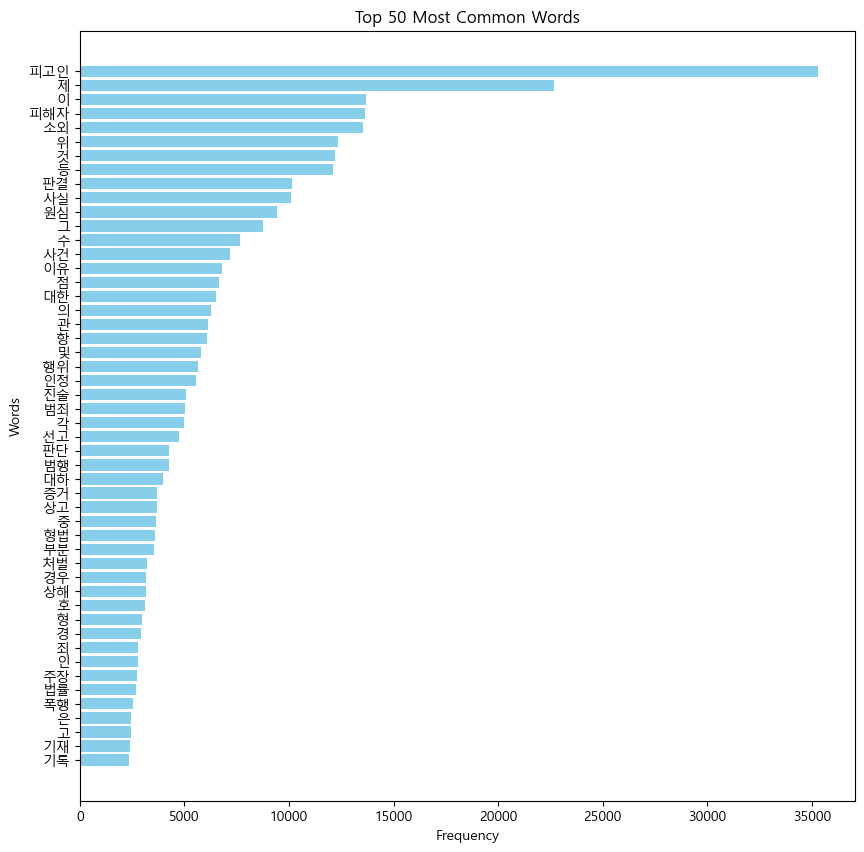

In [54]:
words, frequency = zip(*most_common_words)
plt.figure(figsize=(10,10))
plt.barh(words,frequency,color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Common Words')
plt.gca().invert_yaxis()
plt.show()

In [55]:
with open("data/상해wordlist.txt", "w") as file:
    for item in word_freq:
        file.write(f"{item}\n")

In [ ]:
df=pd.read_csv('data/원하는파일.csv')
okt = Okt()
nouns = []
for doc in df['판례내용'] : #상해의 판례내용
    nouns.extend(okt.nouns(doc))
word_freq = Counter(nouns)

with open("data/wordlist.txt", "w") as file:
    for item in word_freq:
        file.write(f"{item}\n")

# LDA

## 샘플연습

In [4]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# 문서 리스트
documents = [
    "Topic modeling is a technique for uncovering the hidden thematic structure in a collection of documents.",
    "LDA is a generative probabilistic model.",
    "This is a sample document for LDA.",
    "Another document that talks about topic modeling."
]

# CountVectorizer로 문서 단어 행렬 생성
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(documents)

# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(doc_term_matrix)

# 주제 출력
for index, topic in enumerate(lda.components_):
    print(f"Topic {index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-4:]])

Topic 0:
['model', 'probabilistic', 'document', 'lda']
Topic 1:
['structure', 'thematic', 'modeling', 'topic']


In [2]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora

# NLTK 불용어 다운로드
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 문서 리스트 예시
documents = [
    "Topic modeling is a technique for uncovering the hidden thematic structure in a collection of documents.",
    "LDA is a generative probabilistic model.",
    "This is a sample document for LDA.",
    "Another document that talks about topic modeling."
]

# 전처리 함수
def preprocess(doc):
    tokens = doc.lower().split()  # 소문자로 변환 후 공백으로 분리
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# 전처리된 문서 리스트
processed_docs = [preprocess(doc) for doc in documents]

processed_docs

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['topic',
  'modeling',
  'technique',
  'uncovering',
  'hidden',
  'thematic',
  'structure',
  'collection'],
 ['lda', 'generative', 'probabilistic'],
 ['sample', 'document'],
 ['another', 'document', 'talks', 'topic']]

In [3]:
from gensim import corpora
from gensim.models import LdaModel

# 샘플 데이터
texts = [['human', 'interface', 'computer'],
         ['survey', 'user', 'opinion', 'of', 'computer', 'system'],
         ['eps', 'user', 'system', 'response', 'time'],
         ['system', 'human', 'system', 'engineering'],
         ['user', 'interference', 'management'],
         ['human', 'information', 'processing', 'system']]

# 단어 사전 생성
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 학습
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# 각 주제의 단어들 출력
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.159*"user" + 0.111*"system" + 0.069*"computer" + 0.068*"opinion" + 0.068*"of" + 0.068*"survey" + 0.068*"response" + 0.068*"time" + 0.068*"eps" + 0.068*"management"
Topic 1: 0.187*"system" + 0.183*"human" + 0.078*"processing" + 0.078*"information" + 0.078*"engineering" + 0.078*"computer" + 0.078*"interface" + 0.027*"user" + 0.027*"interference" + 0.027*"management"


# 실제

In [17]:
noun=list(new_df['nouns'])

In [23]:

# 단어 사전 생성
dictionary = corpora.Dictionary(noun)

# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(text) for text in noun]

# LDA 모델 학습
lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary, passes=30)

# 각 주제의 단어들 출력
for idx, topic in lda_model.print_topics(-1,num_words=20):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.027*"제" + 0.017*"여부" + 0.015*"경우" + 0.014*"피고인" + 0.013*"등" + 0.012*"행위" + 0.012*"사례" + 0.010*"및" + 0.009*"관" + 0.009*"판결" + 0.008*"사실" + 0.008*"인정" + 0.008*"수" + 0.008*"범죄" + 0.007*"위" + 0.007*"적극" + 0.007*"상해" + 0.007*"죄" + 0.007*"처벌" + 0.007*"그"


In [25]:
from gensim.summarization import summarize

summary = summarize(df['판례내용'].str.cat(sep=' '), ratio=0.1)  # 10% 비율로 요약
print(summary)

ModuleNotFoundError: No module named 'gensim.summarization'

In [18]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

df_Labor = pd.read_csv('data/프로젝트 데이터_API/상해_본문.csv')

stopwords_file_path = 'data/상해stopwords.txt'

stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

    okt = Okt()
tokenized_docs = []

for doc in df_Labor['판례내용'].iloc[:200]:
    tokens = okt.nouns(doc)
    filtered_tokens = [word for word in tokens if word not in stopwords]
    tokenized_docs.append(' '.join(filtered_tokens))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_docs)

num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    top_features_ind = topic.argsort()[-10:][::-1]
    top_features = [vectorizer.get_feature_names_out()[i] for i in top_features_ind]
    print(" ".join(top_features))

Topic 0:
승객 선박 선장 퇴선 사고 조치 피해자 구조 선원 조난
Topic 1:
피해자 폭행 폭력 범행 범죄 상해 위반 부위 수용 법정
Topic 2:
범행 집행 공무 방해 공무원 사고 피해자 직무 심신 미약
Topic 3:
피해자 상해 차량 주장 범행 범죄 사정 치료 벌금 오인
Topic 4:
거주 주거 출입 피해자 아파트 주거침입죄 조합 공동 위반 형법
Topic 5:
범죄 위반 범행 청소년 기술 형법 성매매 자동차 가중 도로교통법
Topic 6:
피해자 범죄 범행 상해 형법 폭행 징역 공판 양형 주장
Topic 7:
피해자 폭행 공연 형법 전파 범죄 범행 의무 다수 상태
Topic 8:
감경 형법 집행 사유 임의 해석 확정 징역 결정 범위
Topic 9:
범죄 명령 경찰관 부착 필로폰 집행 청구 체포 고단 전자


In [40]:
import pyLDAvis
import pyLDAvis.gensim_models

# 시각화 준비
# pyLDAvis로 시각화 준비
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')


#밑에 LdaModel 쓴것과 같은 값이 나온다.

In [23]:
from gensim import corpora
from gensim.models import LdaModel

stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

    okt = Okt()
tokenized_docs = []

for doc in df_Labor['판례내용'].iloc[:200]:
    tokens = okt.nouns(doc)
    filtered_tokens = [word for word in tokens if word not in stopwords]
    tokenized_docs.append(filtered_tokens)

# 사전(dictionary) 생성 및 코퍼스(corpus) 구성
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

# LDA 모델 설정 및 학습
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

# 주제별 상위 단어 출력
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.007*"승객" + 0.006*"사고" + 0.005*"후" + 0.005*"상태" + 0.005*"사정" + 0.004*"발생" + 0.004*"퇴선" + 0.004*"폭행" + 0.004*"조치" + 0.004*"선박"
Topic 2: 0.009*"폭행" + 0.006*"양형" + 0.005*"상태" + 0.005*"징역" + 0.005*"폭력" + 0.004*"의무" + 0.004*"승객" + 0.004*"선박" + 0.004*"말" + 0.004*"사정"
Topic 3: 0.009*"폭행" + 0.006*"폭력" + 0.006*"승객" + 0.005*"조치" + 0.005*"선박" + 0.005*"선장" + 0.004*"징역" + 0.004*"사고" + 0.004*"의무" + 0.004*"사정"
Topic 4: 0.009*"폭행" + 0.006*"감경" + 0.005*"감" + 0.005*"징역" + 0.004*"임의" + 0.004*"이상" + 0.004*"가중" + 0.004*"후" + 0.004*"발생" + 0.004*"결정"
Topic 5: 0.008*"폭행" + 0.006*"거주" + 0.005*"사정" + 0.005*"말" + 0.005*"선박" + 0.005*"발생" + 0.005*"공동" + 0.004*"자신" + 0.004*"상황" + 0.004*"출입"


In [26]:
import pyLDAvis.gensim_models
import pyLDAvis

# pyLDAvis를 사용한 LDA 시각화
pyLDAvis.enable_notebook()  # Jupyter Notebook에서 사용 시
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

#감마값은 1에 가까울 수록 토픽에서 나오는 단어들의 빈도순으로 키워드들이 나오고 0에 가까워질수록 데이터 전체에서 나오는 단어들은 제하고 해당 토픽에만 나오는 단어들에 가중치를 줘서 키워드를 도출한다

In [12]:
#전체 단어리스트에서 불용어에 안넣을 단어들 빼서 불용어 사전만들기
a=pd.read_csv('data/상해wordlist.txt',header=None)
b=pd.read_csv('data/wordlist(not불용어).txt',header=None)

df_result = a[~a[0].isin(b[0])]
df_result.to_csv('data/상해stopwords.txt',index=False,header=False)


# 진짜 전체 실제

In [2]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from collections import Counter

#불용어 읽어오기
stopwords_file_path = 'stopwords_dh_lastlast.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)

tokenized_docs = []

for doc in normalized:  # normalized 시리즈에서 각 문서 처리
    # 공백으로 나누어 단어 리스트 생성
    filtered_tokens = [word for word in doc.split() if word not in stopwords]  
    tokenized_docs.append(" ".join(filtered_tokens))  # 리스트로 저장 (문자열 형태로)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_docs)

num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    top_features_ind = topic.argsort()[-10:][::-1]
    top_features = [vectorizer.get_feature_names_out()[i] for i in top_features_ind]
    print(" ".join(top_features))

Topic 0:
보고 수사 자백 경찰 살해 검찰 아동 상황 사람 대통령
Topic 1:
의사 이혼 혼인 아파트 상해 거주 행사 건물 채권 권리
Topic 2:
회사 주식회사 지급 임금 사업 징계 근로자 재산 근로 거래
Topic 3:
사고 차량 운전 손해 자동차 지급 손해배상 운행 부담 치료
Topic 4:
상해 폭행 징역 폭력 가중 형사소송법 강간 공소 오해 경합
Topic 5:
문건 북한 중국 조직 활동 국가 지시 지역 보고 선거
Topic 6:
보험 지급 계약 보험금 치료 장해 손해 상해 사고 사망
Topic 7:
북한 조직 혁명 활동 국가 전쟁 압수 준비 녹음 학생
Topic 8:
작업 안전 선박 사고 의무 공사 관리 승객 회사 현장
Topic 9:
집회 시위 경찰관 경찰 방해 체포 공무 노조 직무 조합원


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

# 시각화 준비
# pyLDAvis로 시각화 준비
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')


#밑에 LdaModel 쓴것과 같은 값이 나온다.

In [4]:
from gensim import corpora
from gensim.models import LdaModel

stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

lda_tokenized_docs = []

for doc in normalized:  # normalized 시리즈에서 각 문서 처리
    # 불용어를 제거한 명사 리스트로 저장
    lda_filtered_tokens = [word for word in doc.split() if word not in stopwords]  
    lda_tokenized_docs.append(lda_filtered_tokens)  # 리스트로 저장

# 사전(dictionary) 생성 및 코퍼스(corpus) 구성
dictionary = corpora.Dictionary(lda_tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in lda_tokenized_docs]

# LDA 모델 설정 및 학습
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

# 주제별 상위 단어 출력
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.010*"상해" + 0.008*"죄" + 0.007*"형" + 0.006*"폭행" + 0.005*"징역" + 0.005*"보험" + 0.005*"형사소송법" + 0.004*"의사" + 0.004*"폭력" + 0.004*"공소"
Topic 2: 0.005*"징계" + 0.005*"회사" + 0.004*"상해" + 0.004*"근무" + 0.003*"육군" + 0.003*"죄" + 0.003*"폭행" + 0.003*"볼" + 0.003*"직무" + 0.003*"폭력"
Topic 3: 0.027*"사고" + 0.013*"손해" + 0.009*"상해" + 0.009*"치료" + 0.008*"운전" + 0.008*"지급" + 0.008*"차량" + 0.007*"부담" + 0.006*"돈" + 0.006*"배상"
Topic 4: 0.025*"보험" + 0.017*"지급" + 0.013*"사고" + 0.011*"손해" + 0.009*"계약" + 0.008*"치료" + 0.008*"회사" + 0.007*"상해" + 0.007*"부담" + 0.006*"의무"
Topic 5: 0.005*"회사" + 0.004*"진단" + 0.004*"의사" + 0.004*"상해" + 0.003*"치료" + 0.003*"주식회사" + 0.003*"등기" + 0.003*"의무" + 0.003*"경찰" + 0.003*"명의"


In [5]:
import pyLDAvis.gensim_models
import pyLDAvis

# pyLDAvis를 사용한 LDA 시각화
pyLDAvis.enable_notebook()  # Jupyter Notebook에서 사용 시
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

#감마값은 1에 가까울 수록 토픽에서 나오는 단어들의 빈도순으로 키워드들이 나오고 0에 가까워질수록 데이터 전체에서 나오는 단어들은 제하고 해당 토픽에만 나오는 단어들에 가중치를 줘서 키워드를 도출한다